тут мы удаляем прыжки, вручную ставя границы

In [1]:
import traja
import pandas as pd
import numpy as np

df = pd.read_csv('sost_Trace.csv')

In [2]:
#remove rows with outliers
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]

In [3]:
def cutjump(df, xmax, xmin, ymax, ymin):
    dff = df[(df['x'] < xmax) & (df['x'] > xmin) & (df['y'] < ymax) & (df['y'] > ymin)]
    return dff

In [4]:
cutdf = cutjump(df, xmax=47, xmin=-47, ymax=47, ymin=-47)

In [13]:
%matplotlib

Using matplotlib backend: Qt5Agg


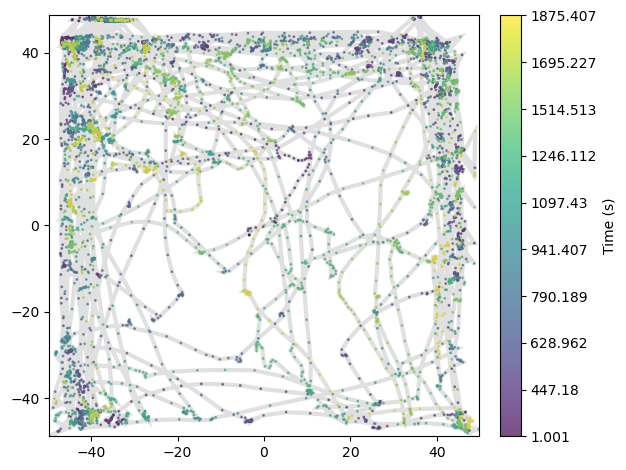

In [5]:
df.traja.plot()

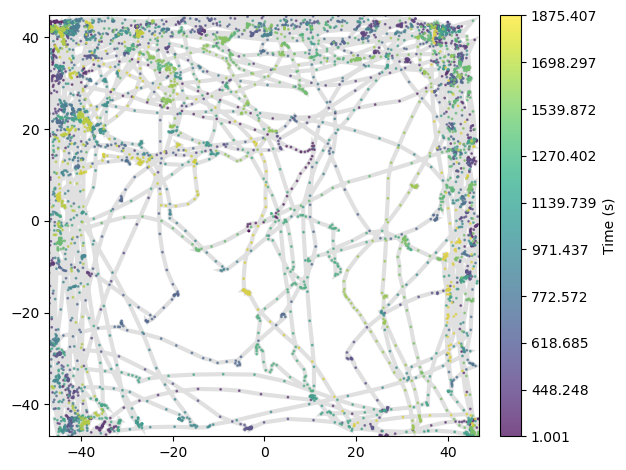

In [6]:
cutdf.traja.plot()

## Построим окупац карты

In [19]:
import seaborn as sns


In [17]:
def occupMapNorm(df):
    xmin = df["x"].min() - 0.1
    xmax = df["x"].max() + 0.1
    binx = np.linspace(xmin, xmax, 16)
    x_cut = pd.cut(df.x, binx, right=False)
    #делаем df где будет понятно сколько было точек в каждом бине 
    #соответсвуеющему данному интервалу х и данному интервалу у
    ymin = df["y"].min() - 0.1
    ymax = df["y"].max() + 0.1
    biny = np.linspace(ymin, ymax, 16)
    y_cut = pd.cut(df.y, biny, right=False)
    dfn = df.groupby([x_cut, y_cut]).count()
    
    print(x_cut.isnull().values.any(), y_cut.isnull().values.any())
    
    dfn = dfn.drop(columns=['x','y'])
    dfn = dfn.rename(columns={'time': 'Count'})
    
    #сделаем df с норм числами в индексах, а не с интервалами
    L = [(a.mid, b.mid) for a, b in dfn.index]
    dfm = dfn.set_index(pd.MultiIndex.from_tuples(L, names=dfn.index.names))
    
    dd = dfm.unstack()
    dd = dd.replace(0, 1.e-1)
    #обычный бины
    arrd = dd.to_numpy()
    #нормализация лог
    arrl = np.log(arrd)
    #нормализация квадрат
    arrsrsr = np.sqrt(np.sqrt(np.sqrt(arrd)))
    sns.heatmap(arrl, square=True, xticklabels=False, yticklabels=False)
    return(arrl)
    

In [21]:
occupMapNorm(df)

False False


array([[ 4.02535169,  3.49650756,  4.00733319,  4.24849524,  1.79175947,
         2.7080502 ,  4.34380542,  3.93182563,  4.17438727,  3.21887582,
         4.74493213,  4.07753744,  4.81218436,  5.32300998,  4.96284463],
       [ 5.19295685,  4.18965474,  3.29583687,  2.30258509,  2.19722458,
         3.52636052,  3.4657359 ,  3.21887582,  2.19722458,  4.02535169,
         5.37989735,  4.47733681,  4.2341065 ,  5.3082677 ,  5.5174529 ],
       [ 4.21950771,  3.29583687,  1.79175947,  2.19722458,  2.30258509,
         1.60943791,  0.69314718,  1.38629436,  2.39789527,  3.04452244,
         4.31748811,  3.25809654,  3.4657359 ,  4.35670883,  6.38687932],
       [ 3.4657359 ,  1.38629436,  2.19722458,  1.09861229,  2.30258509,
        -2.30258509, -2.30258509,  0.69314718,  1.60943791,  3.78418963,
         2.19722458,  2.39789527,  3.29583687,  5.09986643,  3.98898405],
       [ 2.56494936,  1.79175947,  1.09861229,  0.69314718,  1.09861229,
         2.48490665,  0.69314718,  2.48490665, 

In [22]:
occupMapNorm(cutdf)

False False


array([[ 4.89034913,  4.29045944,  4.4308168 ,  3.8918203 ,  2.48490665,
         3.29583687,  4.24849524,  4.2341065 ,  4.29045944,  3.58351894,
         4.33073334,  5.25227343,  4.54329478,  4.70048037,  6.19031541],
       [ 4.90527478,  3.4657359 ,  1.94591015,  2.30258509,  1.60943791,
         2.83321334,  3.25809654,  2.77258872,  1.79175947,  3.61091791,
         4.61512052,  5.22574667,  3.76120012,  3.95124372,  4.68213123],
       [ 3.76120012,  2.07944154,  1.79175947,  1.79175947,  2.19722458,
         1.38629436,  0.        ,  0.        ,  2.63905733,  2.83321334,
         2.94443898,  2.77258872,  2.94443898,  4.12713439,  4.20469262],
       [ 3.40119738,  1.38629436,  1.79175947,  1.38629436,  2.19722458,
        -2.30258509,  0.        ,  1.60943791,  1.60943791,  3.4339872 ,
         2.94443898,  2.07944154,  2.48490665,  4.14313473,  5.0937502 ],
       [ 2.99573227,  1.38629436,  0.69314718,  0.        ,  0.69314718,
         2.56494936, -2.30258509,  2.07944154, 

In [3]:
%matplotlib

Using matplotlib backend: Qt5Agg


In [5]:
df.traja.plot()

In [13]:
df

,time,x,y
0,1.001,-3.409,-2.178
1,1.134,-3.409,-2.178
2,1.268,-3.409,-2.178
3,1.401,-3.693,-1.231
4,1.535,-3.599,-0.758
...,...,...,...
7600,1874.740,44.510,2.368
7601,1874.873,44.510,5.493
7603,1875.140,44.321,9.944
7604,1875.273,44.321,9.754


In [35]:
dff = df[(df['x'] < 47) & (df['x'] > -47) & (df['y'] < 47) & (df['y'] > -47)]
dff

,time,x,y
0,1.001,-3.409,-2.178
1,1.134,-3.409,-2.178
2,1.268,-3.409,-2.178
3,1.401,-3.693,-1.231
4,1.535,-3.599,-0.758
...,...,...,...
7600,1874.740,44.510,2.368
7601,1874.873,44.510,5.493
7603,1875.140,44.321,9.944
7604,1875.273,44.321,9.754


In [9]:
  
record = {
  'Name': ['Ankit', 'Amit', 'Aishwarya', 'Priyanka', 'Priya', 'Shaurya' ],
  'Age': [21, 19, 20, 18, 17, 21],
  'Stream': ['Math', 'Commerce', 'Science', 'Math', 'Math', 'Science'],
  'Percentage': [88, 92, 95, 70, 65, 78]}
  
# create a dataframe
dataframe = pd.DataFrame(record, columns = ['Name', 'Age', 'Stream', 'Percentage'])
  
dataframe 


,Name,Age,Stream,Percentage
0,Ankit,21,Math,88
1,Amit,19,Commerce,92
2,Aishwarya,20,Science,95
3,Priyanka,18,Math,70
4,Priya,17,Math,65
5,Shaurya,21,Science,78


In [12]:
rslt_df = dataframe[(dataframe['Age'] >= 18) &
          dataframe['Stream'].isin(['Math', 'Science'])]
rslt_df

,Name,Age,Stream,Percentage
0,Ankit,21,Math,88
2,Aishwarya,20,Science,95
3,Priyanka,18,Math,70
5,Shaurya,21,Science,78
